In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix



In [2]:
data= pd.read_csv('values.csv')
data.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [3]:
data.shape

(180, 15)

In [4]:
data.info

<bound method DataFrame.info of     patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128         

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [6]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [8]:
data.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.138255


In [9]:
data = data.drop(labels="patient_id" , axis=1)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [10]:
# checking the ditribution of heart_disease_present(target variable)
data['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [11]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.thal = enc.fit_transform(data.thal)

In [13]:
data.thal.unique()

array([1, 2, 0])

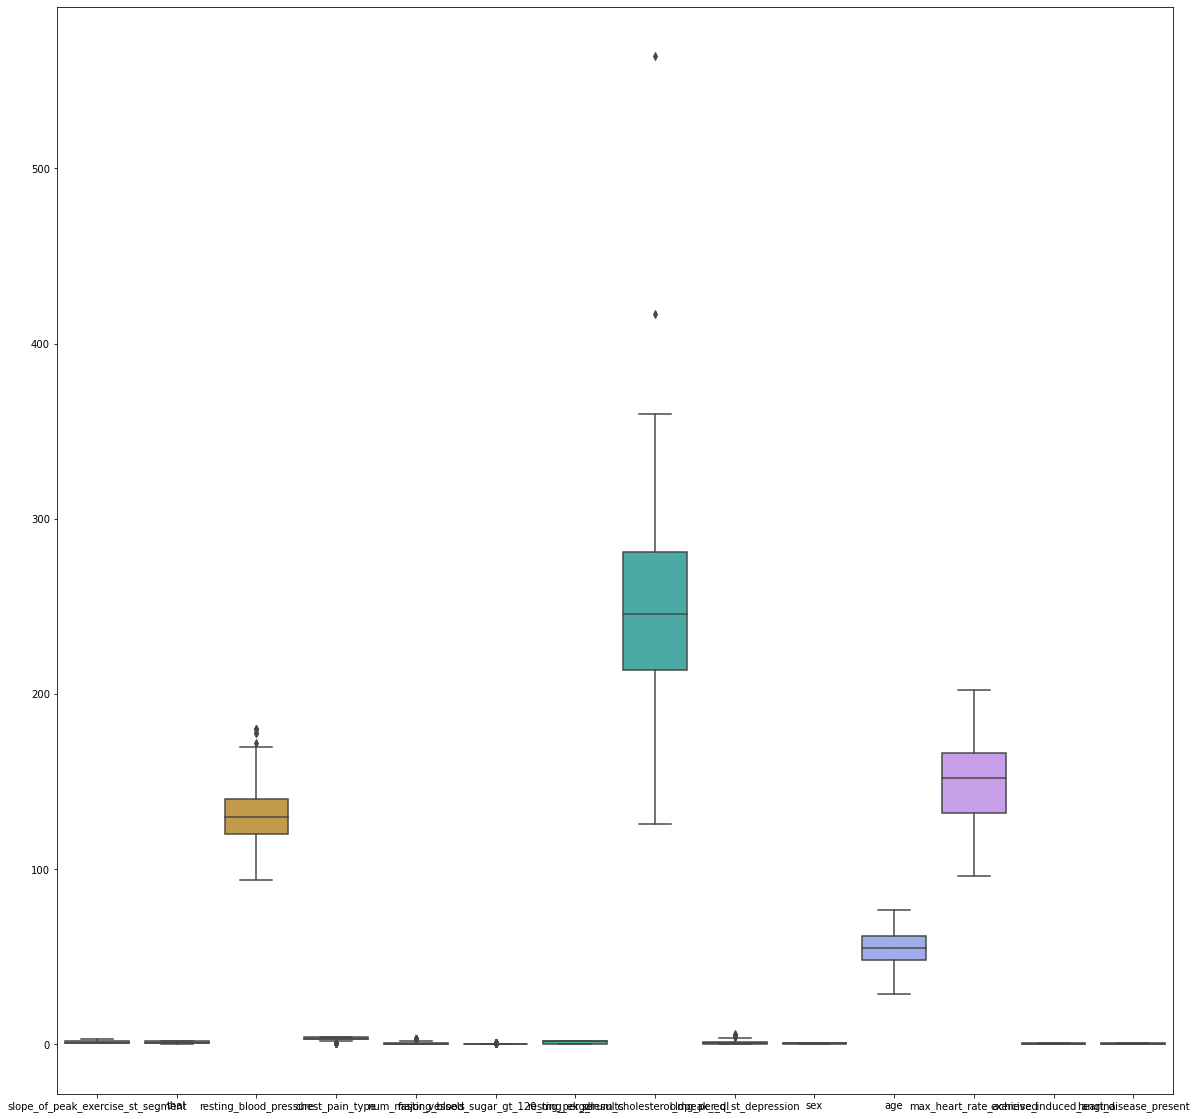

In [14]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=data)

<AxesSubplot:>

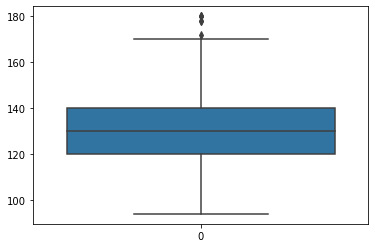

In [15]:
sns.boxplot(data=data['resting_blood_pressure'])

<AxesSubplot:>

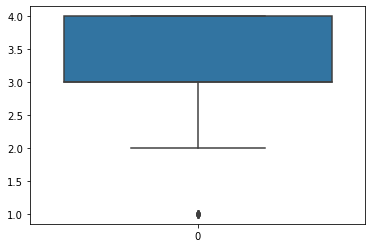

In [16]:
sns.boxplot(data=data['chest_pain_type'])

<AxesSubplot:>

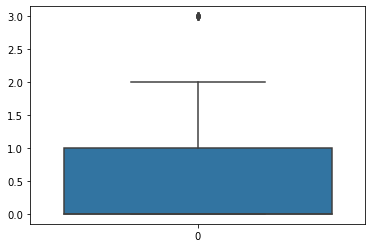

In [17]:
sns.boxplot(data=data['num_major_vessels'])

<AxesSubplot:>

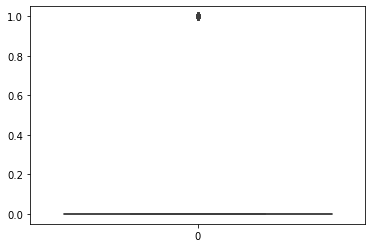

In [18]:
sns.boxplot(data=data['fasting_blood_sugar_gt_120_mg_per_dl'])

<AxesSubplot:>

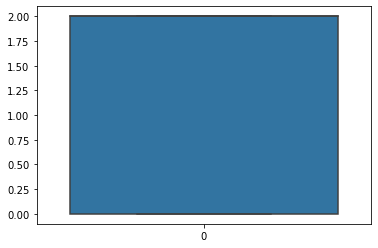

In [19]:
sns.boxplot(data=data['resting_ekg_results'])

<AxesSubplot:>

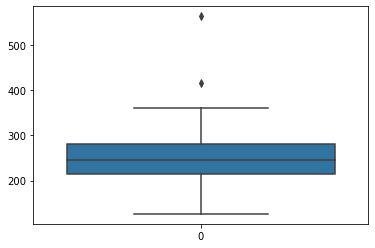

In [20]:
sns.boxplot(data=data['serum_cholesterol_mg_per_dl'])

<AxesSubplot:>

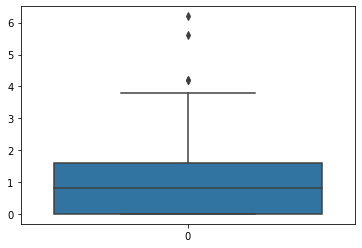

In [21]:
sns.boxplot(data=data['oldpeak_eq_st_depression'])

<AxesSubplot:>

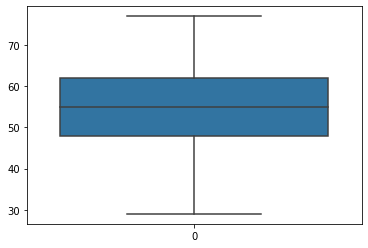

In [22]:
sns.boxplot(data=data['age'])

<AxesSubplot:>

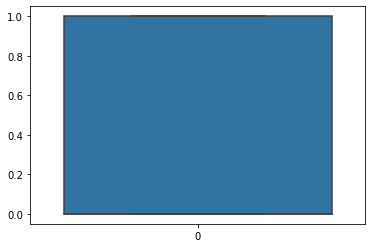

In [23]:
sns.boxplot(data=data['exercise_induced_angina'])

<AxesSubplot:>

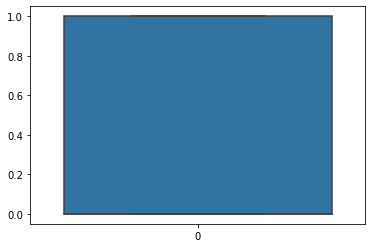

In [24]:
sns.boxplot(data=data['heart_disease_present'])

In [25]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[0.89124111 0.64705882 0.19519463 ... 0.93248505 0.68074565 0.89442719]
 [0.72919727 0.64705882 1.25631978 ... 0.38708356 0.68074565 0.89442719]
 [0.89124111 0.64705882 0.37204882 ... 0.56888406 1.46897745 1.11803399]
 ...
 [0.72919727 1.11764706 0.37204882 ... 0.8400698  1.46897745 1.11803399]
 [0.89124111 0.64705882 0.43100022 ... 1.15973567 0.68074565 0.89442719]
 [0.89124111 0.64705882 1.69125009 ... 0.61433418 0.68074565 0.89442719]]


In [26]:
threshold = 3
print(np.where(z > 3))

(array([ 43,  60, 140, 162], dtype=int64), array([7, 7, 8, 8], dtype=int64))


In [27]:
data = data[(z < 3).all(axis=1)]
data.shape

(176, 14)

In [28]:
data.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000
mean,1.534091,1.357955,131.142045,3.147727,0.687500,0.159091,1.039773,247.136364,0.952273,0.698864,54.642045,149.62500,0.318182,0.443182
std,0.603776,0.567948,16.995705,0.944636,0.961584,0.366804,0.999204,45.429552,1.003135,0.460061,9.346794,22.09916,0.467099,0.498179
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.00000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.00000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.650000,1.000000,55.000000,152.00000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,278.000000,1.600000,1.000000,62.000000,167.25000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,360.000000,4.200000,1.000000,77.000000,202.00000,1.000000,1.000000


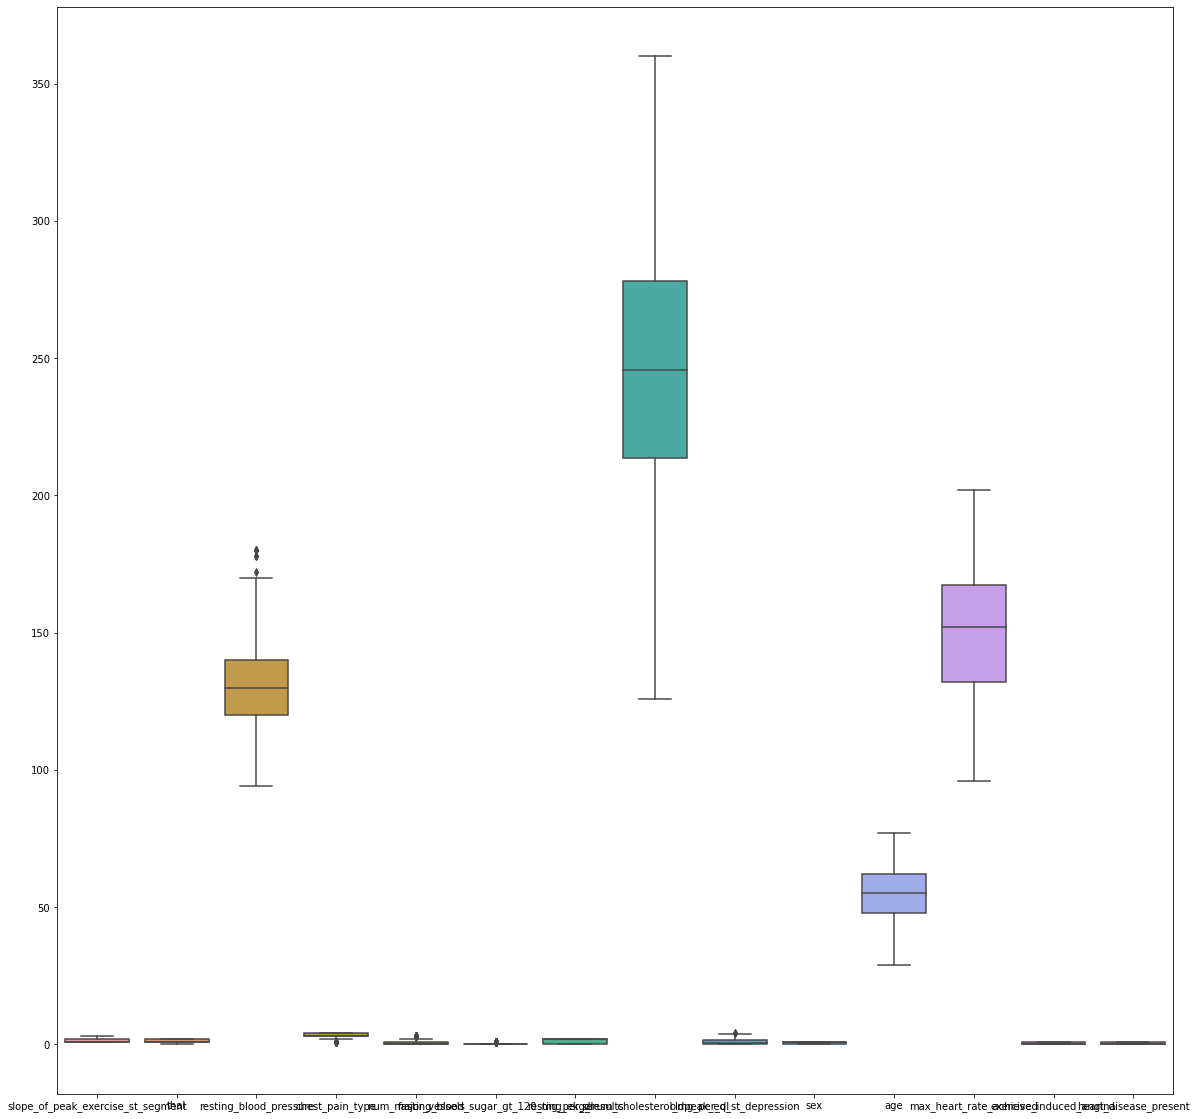

In [29]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=data)

<AxesSubplot:>

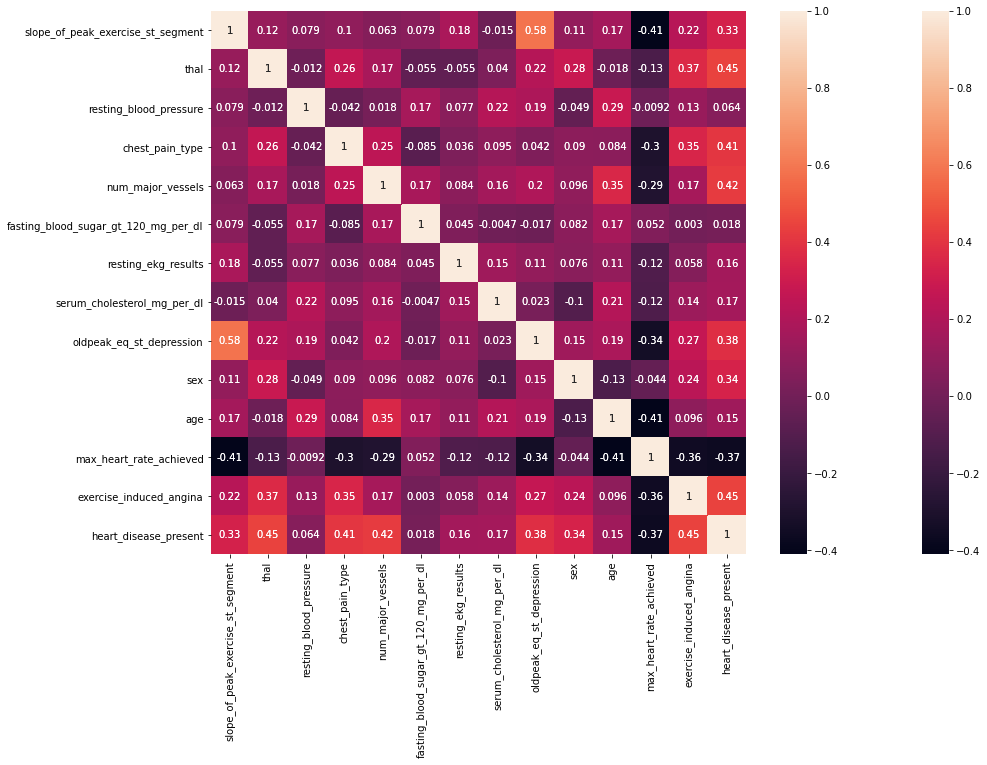

In [30]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [31]:
# Choosing input and output
X = data.drop(columns=['heart_disease_present'], axis=1)
y = data['heart_disease_present']

In [44]:
# Splitting the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=90)

# SVM

In [45]:
from sklearn.svm import SVC
model= SVC()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.6590909090909091

# XGBoost

In [46]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

[17:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\new folderAnaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8863636363636364

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train , y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.75

# Navie Byes

In [48]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
model =BernoulliNB()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8409090909090909

# RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9090909090909091

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

C:\ProgramData\new folderAnaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9318181818181818

# Hyper Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [63]:
model_params = {  
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [65]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.982857,{'n_estimators': 10}
1,logistic_regression,1.000000,{'C': 5}


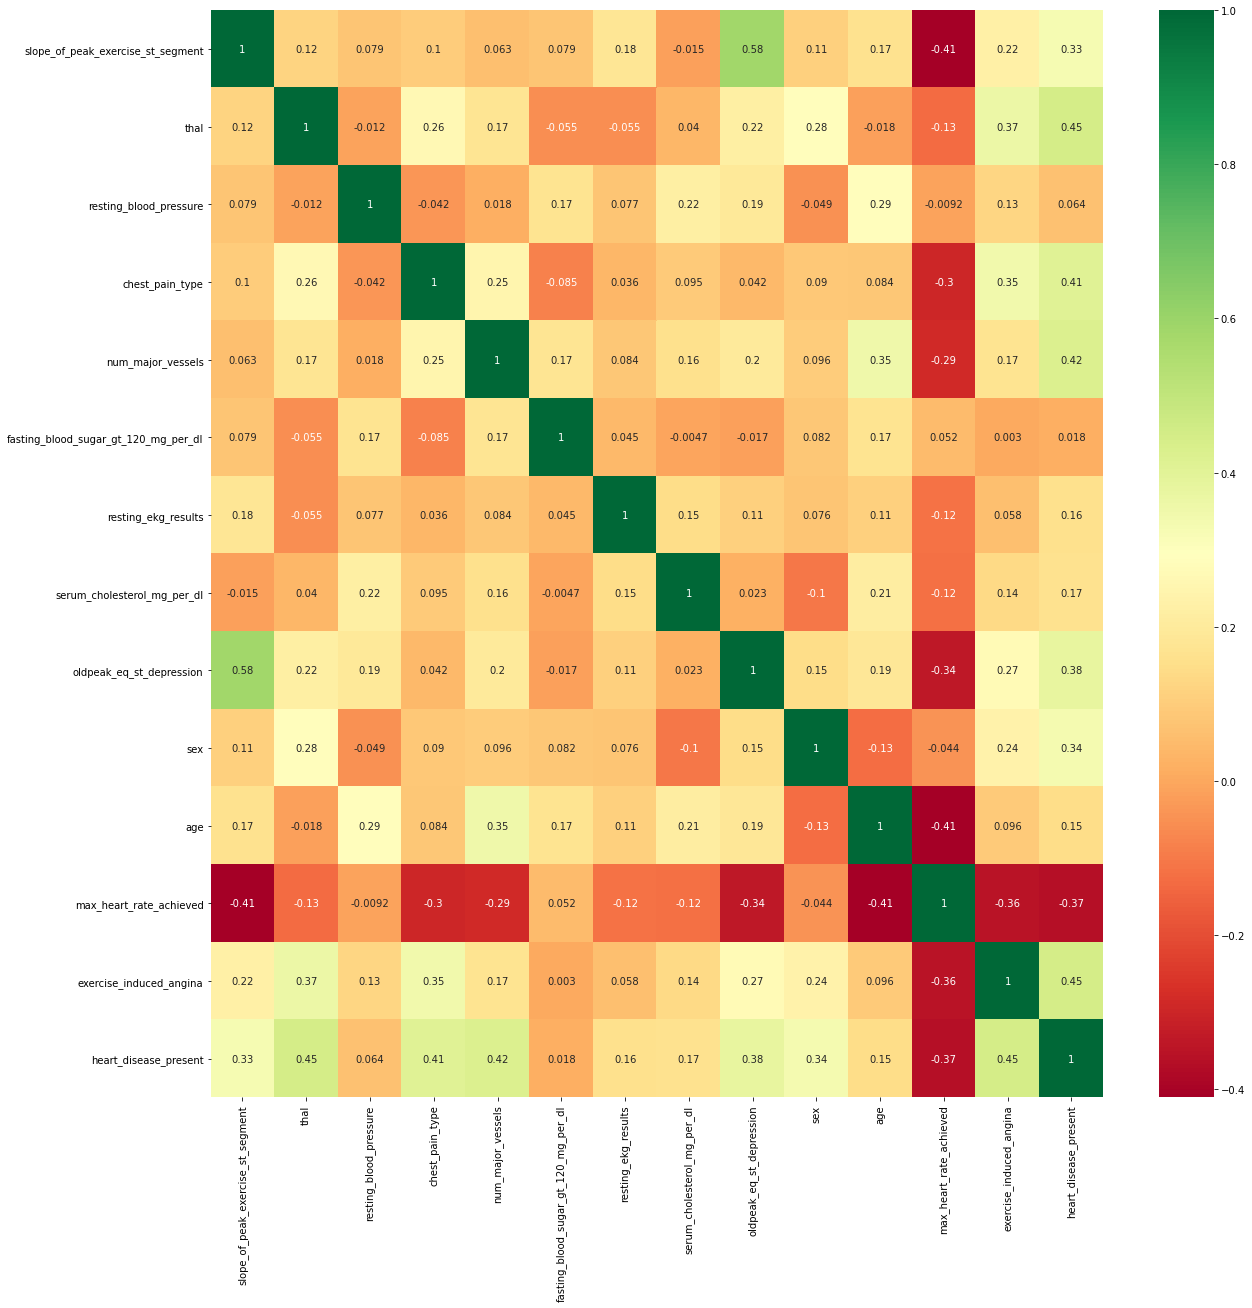

In [54]:
import seaborn as sns
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,]]  #independent columns
y = data.iloc[:,-1]    #dependent value
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")